## Credit Data Set
## Extract-Transform-Load (ETL)
## Machine Learning Algorithms for Classification

Сначала импортируем необходимые библиотеки:

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 0. Описание задачи

Мы рассмотрим исходную выборку, которая содержит записи о клиентах, классифицированных на два класса: `'0'` - клиент не открыл кредитный счет в банке и `'1'` - клиент открыл счет в банке. Сначала мы подготовим данные, чтобы они были понятны и правильно проанализированы машиной. Затем мы создадим классификатор, чтобы предсказать кто не откроет кредитного счета, и тех, кто его откроет, используя признаки.

### По каждому наблюдению (клиенту) фиксируются 15 исходных переменных:
 - `'client_id'` - Идентификационный номер
 - `'gender'` - Пол
 - `'age'` - Возраст
 - `'marital_status'` - Семейный статус
 - `'job_position'` - Сфера занятости
 - `'credit_sum'` - Сумма кредита
 - `'credit_month'` - Срок кредитования
 - `'tariff_id'` - Идентификационный номер тарифа
 - `'score_shk'` - Внутренняя скоринговая оценка
 - `'education'` - Образование
 - `'living_region'` - Регион проживания
 - `'monthly_income'` - Месячный заработок
 - `'credit_count'` - Количество кредитов у клиента
 - `'overdue_credit_count'` - Количество просроченных кредитов у клиента
 - `'open_account_flg'` - Факт открытия кредитного счета в данном банке

## 1. Считывание CSV-файла в объект DataFrame

Загружаем файл из интернета:

In [2]:
url = "https://raw.githubusercontent.com/troshinvlaad/ML/main/credit_train.csv" 
data_raw = pd.read_csv(url, encoding='cp1251', sep=';')

Выведем информацию о форме датафрейма с помощью свойств *shape*:

In [3]:
data_raw.shape

(170746, 15)

Видим, что датафрейм состоит из 170746 строк (наблюдений) и 15 столбцов (переменных). Теперь взглянем на перве 5 наблюдений нашего набора с помощь метода *.head()*:

In [4]:
data_raw.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


Список исходных переменных включает в себя:

In [5]:
data_raw.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

Для начала удалим идентификационную переменную `'client_id'`. Эта переменная имеет столько же уникальных значений, сколько у нас наблюдений, поэтому бесполезна для моделирования.
Для удаления переменной можно применить метод *.drop()*. При этом нужно воспользоваться параметром *axics* и задать значение *1*, поскольку при удалении переменных мы перемещаемся по оси 1, то есть по оси столбцов. Кроме того, чтобы операция была осуществленна на месте, нужно воспользоваться параметром *inplace* и задать для него значение *True*.

In [6]:
data_raw.drop('client_id', axis=1, inplace=True)

In [7]:
data_raw.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


Обратим внимание на странное значение *ОБЛ САРАТОВСКАЯ* переменной `'living_region'`. В следующем пункте подробно рассмотрим данный признак!

## 2. Преобразование типов переменных

Для начала определим количество уникальных значений для всех переменных, чтобы выделить категориальные признаки, используем метод *nunique()*:

In [8]:
data_raw.nunique()

gender                      2
age                        54
marital_status              5
job_position               18
credit_sum              42769
credit_month               31
tariff_id                  32
score_shk               16279
education                   5
living_region             301
monthly_income           1591
credit_count               21
overdue_credit_count        4
open_account_flg            2
dtype: int64

Отдельно выведем уникальные значения переменной `'living_region'`. Используем метод *.unique()*:

In [9]:
data_raw['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

Видно, что один и тот же регион может быть по-разному записан (например, Архангельская область записана как *АРХАНГЕЛЬСКАЯ*, *АРХАНГЕЛЬСКАЯ ОБЛ*, *АРХАНГЕЛЬСКАЯ ОБЛАСТЬ*, *ОБЛ АРХАНГЕЛЬСКАЯ*), некоторые регионы представленны числами типа *74* и *98*.
Удалим столбец с регионом проживания `'living_region'`, так как он нуждается в серьезной предобработке, которой мы займемся в последующей работе (сохраним столбец в отдельный объект).

In [10]:
regions = data_raw['living_region']

In [11]:
data_raw.drop('living_region', axis=1, inplace=True)

In [12]:
data_raw.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,NaN,1.0,0.0,0


Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*)
  - Упорядоченные (*порядковые*)
- Количественные (*числовые*):
  - *Непрерывные*
  - *Дискретные*

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными   

Проверим типы данных и заполненность столбцов с помощью метода *.info()*.

In [13]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  object 
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170739 non-null  object 
 8   education             170741 non-null  object 
 9   monthly_income        170741 non-null  float64
 10  credit_count          161516 non-null  float64
 11  overdue_credit_count  161516 non-null  float64
 12  open_account_flg      170746 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 16.9+ MB


Количественнные переменные `'credit_sum'` и `'score_shk'` неверно записаны, им присвоен тип `'Object'`. Это обусловленно тем, что вместо точки в качестве десятичнго разделителя использовалась запятая. 

Заменим запятые на точки в переменных `'credit_sum'` и `'score_shk'` и присвоим переменным тип `'float'`. Воспользуемся циклом *for* и связыванием методов (method chaining):

In [14]:
for i in ['credit_sum', 'score_shk']:
    data_raw[i] = data_raw[i].str.replace(',', '.').astype('float')

Заметим, что столбцы `'gender'`, `'marital_status'`, `'job_position'`, `'education'`, `'open_account_flg'`, и `'tariff_id'`, содержат категориальные значения. Пока они имеют тип `'Object'`, `'int64'` или `'float64'`. Заменим тип на специальный, предназначенный для хранения категориальных значений, а для компактности программного кода воспользуемся циклом *for*:

In [15]:
for i in ['gender', 'marital_status', 'job_position', 'education', 'open_account_flg', 'tariff_id']:
    data_raw[i] = data_raw[i].astype('category')

Снова взглянем на типы переменных:

In [16]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   gender                170746 non-null  category
 1   age                   170743 non-null  float64 
 2   marital_status        170743 non-null  category
 3   job_position          170746 non-null  category
 4   credit_sum            170744 non-null  float64 
 5   credit_month          170746 non-null  int64   
 6   tariff_id             170746 non-null  category
 7   score_shk             170739 non-null  float64 
 8   education             170741 non-null  category
 9   monthly_income        170741 non-null  float64 
 10  credit_count          161516 non-null  float64 
 11  overdue_credit_count  161516 non-null  float64 
 12  open_account_flg      170746 non-null  category
dtypes: category(6), float64(6), int64(1)
memory usage: 10.1 MB


Теперь мы видим, что категориальные переменные верно записаны, как категориальные переменные: им присвоен тип `'category'`. Количественные переменные тоже верно записаны, им присвоен тип `'float'`. 

Посмотрим наблюдения и убедимся, что теперь в переменных `'credit_sum'` и `'score_shk'` в качестве десятичного разделителя используется точка, а не запятая:

In [17]:
data_raw.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,NaN,1.0,0.0,0


## 3. Обработка редких категорий

Посмотрим распределение значений по всем категориальным переменным:

In [18]:
categorical_colamns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
for c in categorical_colamns:
    print(data_raw[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.29        1
1.96        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
Name: education, dtype:

Переменные `'job_position'` и `'tariff_id'` содержат множественные редкие категории.
Выведем частоты категорий по переменной  `'job_position'` с помощью метода *.value_counts()*. По умолчанию пропуски не выводятся, и чтобы их вывести, необходимо для параметра *dropna* метода *.value_counts()* задать значение *False*.

In [19]:
print(data_raw['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


Видно, что переменная `'job_position'` не содержит пропусков. Все категории переменной с частотой менее 55 наблюдений (это категории *PNV*, *PNS*, *HSK*, *INV* и *ONB*) объеденим в отдельную категорию *OTHER*:

Сначала создаем серию, у которой значениями будут частоты категорий переменной `'job_position'`.

In [20]:
job_series = data_raw['job_position'].value_counts()

Теперь нам надо определиться с пороговой относительной частотой. В данном случае мы хотим объединить категории с частотой 55 наблюдений и меньше в категорию *OTHER*. Мы делим 55 наблюдений на общее количество наблюдений в наборе данных (170 746 наблюдений), умножаем на 100 и получаем пороговую относительную частоту 0,032. Далее разделим частоту кажжой категории на общее количество наблюдений, умножим на 100, получим относительную частоту и сравним ее с пороговой (0,032).

In [21]:
mask = (job_series / job_series.sum() * 100).lt(0.032)

In [22]:
mask.tail()

PNV    True
PNS    True
HSK    True
INV    True
ONB    True
Name: job_position, dtype: bool

Теперь с помощью функции *np.where()* мы все категории, по которым возвращено значение *TRUE*, заменим на категорию *OTHER*, в противном случае оставим категории неизменными.

In [23]:
data_raw['job_position'] = np.where(data_raw['job_position'].isin(job_series[mask].index),
                                   'OTHER', data_raw['job_position'])

Снова выведем частоты категорий по переменной `'job_position'`.

In [24]:
print(data_raw['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


Теперь выведем частоты категорий по переменной `'tariff_id'`.

In [25]:
print(data_raw['tariff_id'].value_counts(dropna=False))

1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.29        1
1.96        1
Name: tariff_id, dtype: int64


Как и переменная `'job_position'`, переменная `'tariff_id'` не содержит пропусков. Все категории переменной `'tariff_id'` с частотой менее 55 наблюдений (категории *1.29, *1.96*, *1.56*, *1.48*, *1.27*, *1.52*, *1.28*, *1.26* и *1.18*) объеденим в отдельную категорию *1.99*.

In [26]:
tarrif_series = data_raw['tariff_id'].value_counts()
mmask = (tarrif_series / tarrif_series.sum() * 100).lt(0.032)
data_raw['tariff_id'] = np.where(data_raw['tariff_id'].isin(tarrif_series[mmask].index),
                                   '1.99', data_raw['tariff_id'])
print(data_raw['tariff_id'].value_counts(dropna=False))

1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.99       79
1.25       56
Name: tariff_id, dtype: int64


Теперь на основе переменной `'tariff_id'` создадим количественную переменную `'tariff'`. Затем переменной `'tariff_id'` присвоим тип *str* и заменим в ее значениях точки на символы нижнего подчеркивания.

In [27]:
data_raw['tariff'] = data_raw['tariff_id'].astype('float')

In [28]:
data_raw['tariff_id'] = data_raw['tariff_id'].astype('str').str.replace('.', '_', regex=True)

Взглянем на распределение частот переменной `'tariff_id'` после укрупнения категорий.

In [29]:
print(data_raw['tariff_id'].value_counts(dropna=False))

1_1     69355
1_6     39117
1_32    15537
1_4     10970
1_5      7497
1_9      5538
1_43     3930
1_3      3339
1_16     3232
1_0      2245
1_44     2228
1_19     2102
1_2      1306
1_7      1007
1_17      717
1_21      579
1_94      414
1_22      376
1_23      370
1_91      317
1_24      303
1_41      132
1_99       79
1_25       56
Name: tariff_id, dtype: int64


## 4. Обработка пропущенных значений

In [30]:
data_raw.isna().sum()

gender                     0
age                        3
marital_status             3
job_position               0
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
education                  5
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
tariff                     0
dtype: int64

Заменим пропуски по количественной переменной `'age'` медианой. Для этого воспользуемся методом *.fillna()*, задав с помощью параметра *inplace* значение *TRUE*, чтобы выполнить импутацию на месте.

In [31]:
data_raw['age'].fillna(data_raw['age'].median(), inplace = True)

Теперь выполним импутацию количественных переменных `'credit_sum'`, `'score_shk'` и `'monthly_income'` медианами, воспользовавшись циклом *for*:

In [32]:
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    data_raw[i].fillna(data_raw[i].median(), inplace=True)

Пропуски количественных переменных `'credit_count'` и `'overdue_credit_count'` заменим значениями *-1*:

In [33]:
for i in ['credit_count', 'overdue_credit_count']:
    data_raw[i].fillna(-1, inplace=True)

Теперь приступаем к импутации пропусков в категориальных переменных. Выведем частоты категорий переменной `'marital_status'` с помощью метода *.value_counts()*.

In [34]:
print(data_raw['marital_status'].value_counts(dropna=False))

MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
NaN        3
Name: marital_status, dtype: int64


Заменим пропуски модой - самой часто встречающейся категорией, в данном случае категорией *MAR*. Моду можно вычислить с помощью метода *.mode()*.

In [35]:
data_raw['marital_status'].mode()

0    MAR
Name: marital_status, dtype: category
Categories (5, object): ['CIV', 'DIV', 'MAR', 'UNM', 'WID']

In [36]:
data_raw['marital_status'] = data_raw['marital_status'].fillna('MAR')

Снова выведем частоты категорий переменной `'marital_status'`.

In [37]:
print(data_raw['marital_status'].value_counts(dropna=False))

MAR    93957
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64


Выведем частоты категорий переменной `'education'`.

In [38]:
print(data_raw['education'].value_counts(dropna=False))

SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
NaN        5
Name: education, dtype: int64


Заменим пропуски модой, но сделаем это с помощью цепочки методов *.fillna()* и *.value_counts()*:

In [39]:
data_raw['education'].fillna(data_raw['education'].value_counts().index[0], inplace=True)

Частота с индексом *0* в распределении частот, вычисляемом методом *.value_counts()*, и будет как раз модой.

Проверим, что не осталось пропущенных значениий:

In [40]:
data_raw.isna().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
tariff                  0
dtype: int64

## 5. Визуализация

In [41]:
data_raw.describe()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,36.497218,26095.040543,10.980749,0.469473,40138.445674,1.939337,-0.010478,1.324229
std,10.545957,16234.787554,3.536698,0.124263,25044.022734,1.865795,0.313510,0.236226
min,18.000000,2736.000000,3.000000,0.000000,5000.000000,-1.000000,-1.000000,1.000000
25%,28.000000,14908.000000,10.000000,0.379549,25000.000000,1.000000,0.000000,1.100000
50%,34.000000,21229.000000,10.000000,0.461599,35000.000000,2.000000,0.000000,1.320000
75%,43.000000,32068.000000,12.000000,0.552396,50000.000000,3.000000,0.000000,1.600000
max,71.000000,200000.000000,36.000000,1.128291,950000.000000,21.000000,3.000000,1.990000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [42]:
data_raw.describe(include=['category'])

,gender,marital_status,education,open_account_flg
count,170746,170746,170746,170746
unique,2,5,5,2
top,F,MAR,SCH,0
freq,88697,93957,87542,140690


#### Построим график Суммы кредита от Месячного заработка  с учетом Сферы занятости:

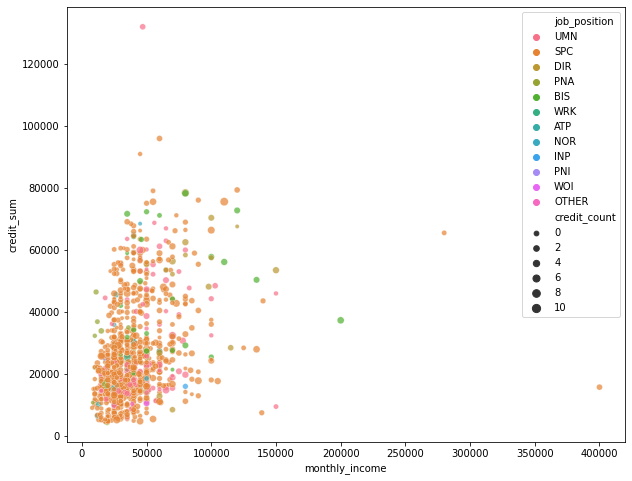

In [43]:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

plt.figure(figsize = (10, 8))
sns.scatterplot(x='monthly_income', y='credit_sum', hue='job_position', size='credit_count', data=data_raw.iloc[random_subset], alpha=0.7, legend="auto")
plt.legend()

#### Построим все диаграммы рассеивания:

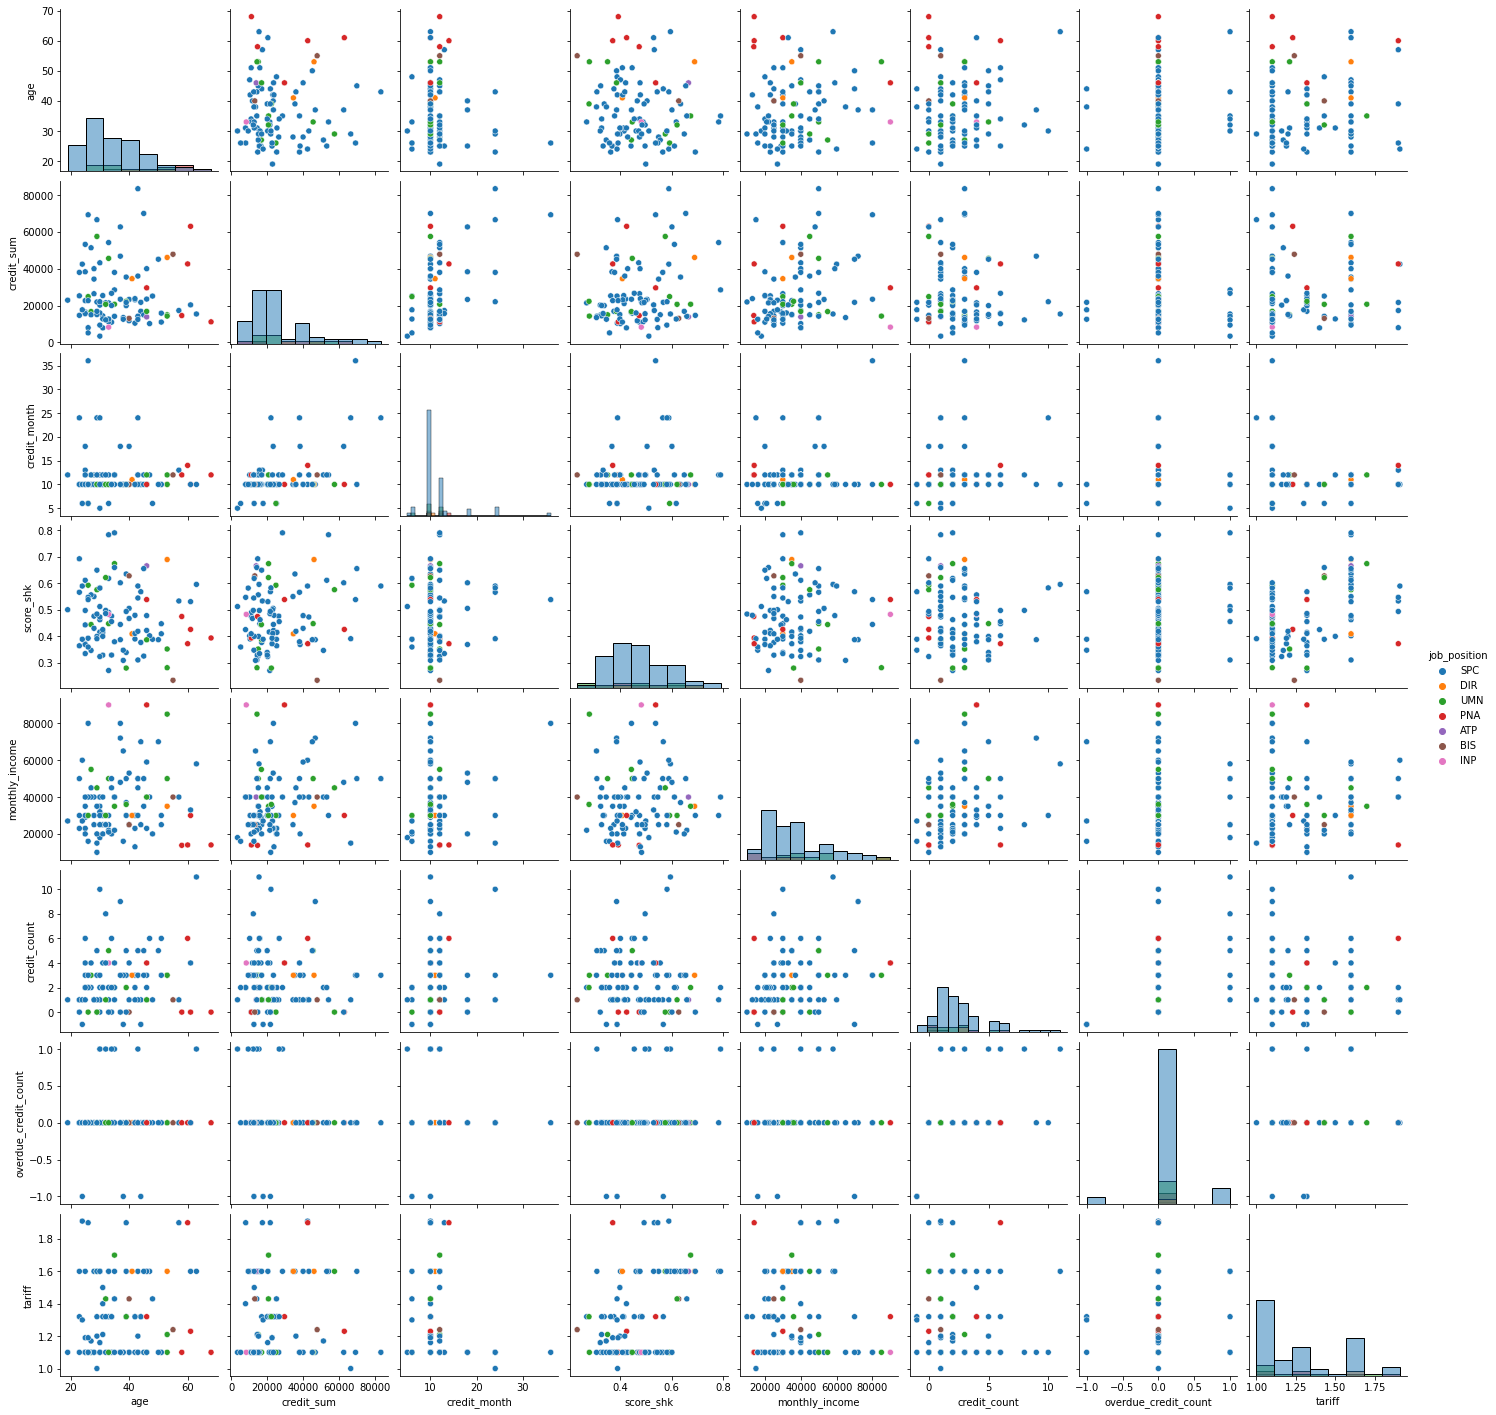

In [44]:
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=100, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='job_position', diag_kind='hist')

#### Построим матрицу корреляции

Можно вычислить матрицу корреляции для количественных признаков:

In [45]:
data_raw.corr()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff
age,1.000000,-0.096613,0.007099,-0.166308,-0.014882,0.184876,0.167628,-0.109205
credit_sum,-0.096613,1.000000,0.228323,0.054422,0.351489,-0.001382,-0.033639,0.091990
credit_month,0.007099,0.228323,1.000000,0.040373,0.007660,0.049876,0.012886,-0.055903
score_shk,-0.166308,0.054422,0.040373,1.000000,-0.107255,-0.139903,-0.006843,0.396755
monthly_income,-0.014882,0.351489,0.007660,-0.107255,1.000000,0.150961,0.056825,0.013614
credit_count,0.184876,-0.001382,0.049876,-0.139903,0.150961,1.000000,0.391939,-0.069525
overdue_credit_count,0.167628,-0.033639,0.012886,-0.006843,0.056825,0.391939,1.000000,0.012695
tariff,-0.109205,0.091990,-0.055903,0.396755,0.013614,-0.069525,0.012695,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

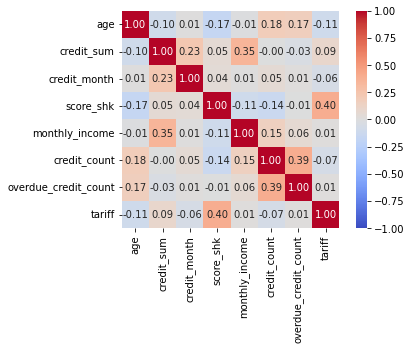

In [46]:
sns.heatmap(data_raw.corr(), square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

#### Рассмотрим соотношение: Факт открытия кредитного счета в данном банке или его отсутствие.

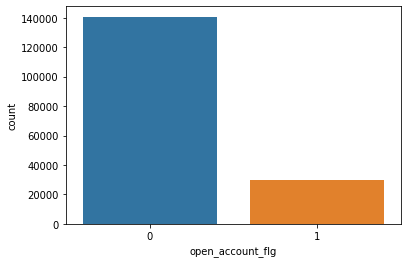

In [47]:
sns.countplot(x='open_account_flg', data=data_raw)
pass

Наблюдаем преобладание класса *0*: клиент не открыл кредитный счет в банке.

## 6. Дамми-кодирование (One-hot Encoding)

Функция *pd.get_dummies()* автоматически преобразует заданную категориальную переменную в набор дамми-меременных. Давайте преобразуем переменную `'marital_status'` в набор дамми-переменных по методу неполного ранга.

In [48]:
dummies_unfull_rank_marital_status = pd.get_dummies(data_raw['marital_status'])

Выведем первые пять наблюдений:

In [49]:
dummies_unfull_rank_marital_status.head()

,CIV,DIV,MAR,UNM,WID
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


Функция *pd.get_dummies()* автоматически преобразует все столбы, которые являются категориальными переменнными, в дами-переменные.

In [50]:
#печатаем названия столбцов до и после дамми-кодирования
print("Исходные переменные:\n", list(data_raw.columns), "\n")
data_raw_dummies = pd.get_dummies(data_raw)
print("Переменные после get_dummies:\n", list(data_raw_dummies.columns), "\n")

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_position_PNI', 'job_position_SPC', 'job_position_UMN', 'job_position_WOI', 'job_position_WRK', 'job_position_WRP', 'tariff_id_1_0', 'tariff_id_1_1', 'tariff_id_1_16', 'tariff_id_1_17', 'tariff_id_1_19', 'tariff_id_1_2', 'tariff_id_1_21', 'tariff_id_1_22', 'tariff_id_1_23', 'tariff_id_1_24', 'tariff_id_1_25', 'tarif

In [51]:
#увеличим количество выводимых столбцов
pd.set_option('display.max_columns', 100)
data_raw_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,open_account_flg_0,open_account_flg_1
0,34.0,59998.00,10,0.461599,30000.0,1.0,1.0,1.6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,34.0,10889.00,6,0.461599,35000.0,2.0,0.0,1.1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,32.0,10728.00,12,0.461599,35000.0,5.0,0.0,1.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,27.0,12009.09,12,0.461599,35000.0,2.0,0.0,1.1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,45.0,21229.00,10,0.421385,35000.0,1.0,0.0,1.1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


Видно, что количественные переменные остались без изменнений (они приводятся первыми), а категориальные переменные были преобразованы в количественные. Заметим, что категориальная переменная `'open_account_flg'` теперь представлена двумя количественными переменными `'open_account_flg_0'` и `'open_account_flg_1'`.

## 7. Нормализация

Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку [0;1].

In [52]:
data_raw_dummies = (data_raw_dummies - data_raw_dummies.min(axis=0)) / (data_raw_dummies.max(axis=0) - data_raw_dummies.min(axis=0))

In [53]:
data_raw_dummies.describe()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,open_account_flg_0,open_account_flg_1
count,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000,170746.000000
mean,0.349004,0.118415,0.241841,0.416092,0.037184,0.133606,0.247381,0.327504,0.519468,0.480532,0.024575,0.099382,0.550274,0.305419,0.020352,0.016346,0.032745,0.000738,0.021962,0.001411,0.003145,0.000387,0.024053,0.000381,0.788774,0.103510,0.002062,0.003842,0.000644,0.013148,0.406188,0.018929,0.004199,0.012311,0.007649,0.003391,0.002202,0.002167,0.001775,0.000328,0.019555,0.090995,0.064247,0.000773,0.023017,0.013049,0.043907,0.229095,0.005898,0.032434,0.001857,0.002425,0.000463,0.000627,0.425140,0.003309,0.512703,0.058221,0.823972,0.176028
std,0.198980,0.082300,0.107173,0.110134,0.026502,0.084809,0.078377,0.238613,0.499622,0.499622,0.154825,0.299174,0.497468,0.460586,0.141201,0.126802,0.177968,0.027155,0.146561,0.037543,0.055992,0.019657,0.153215,0.019507,0.408180,0.304625,0.045358,0.061865,0.025374,0.113910,0.491122,0.136274,0.064665,0.110269,0.087122,0.058134,0.046875,0.046500,0.042088,0.018107,0.138467,0.287603,0.245194,0.027794,0.149957,0.113483,0.204890,0.420252,0.076570,0.177151,0.043048,0.049181,0.021505,0.025025,0.494366,0.057429,0.499840,0.234162,0.380845,0.380845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188679,0.061704,0.212121,0.336393,0.021164,0.090909,0.250000,0.101010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.301887,0.093747,0.212121,0.409113,0.031746,0.136364,0.250000,0.3

## 8. Разбиваем данные на обучающую и тестовую выборки

In [54]:
data_raw_dummies.columns

Index(['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'tariff', 'gender_F',
       'gender_M', 'marital_status_CIV', 'marital_status_DIV',
       'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID',
       'job_position_ATP', 'job_position_BIS', 'job_position_BIU',
       'job_position_DIR', 'job_position_INP', 'job_position_NOR',
       'job_position_OTHER', 'job_position_PNA', 'job_position_PNI',
       'job_position_SPC', 'job_position_UMN', 'job_position_WOI',
       'job_position_WRK', 'job_position_WRP', 'tariff_id_1_0',
       'tariff_id_1_1', 'tariff_id_1_16', 'tariff_id_1_17', 'tariff_id_1_19',
       'tariff_id_1_2', 'tariff_id_1_21', 'tariff_id_1_22', 'tariff_id_1_23',
       'tariff_id_1_24', 'tariff_id_1_25', 'tariff_id_1_3', 'tariff_id_1_32',
       'tariff_id_1_4', 'tariff_id_1_41', 'tariff_id_1_43', 'tariff_id_1_44',
       'tariff_id_1_5', 'tariff_id_1_6', 'tariff_id_1_7', 'tariff_id_1_9',

С помощью метода sample() случайным образом отберем 70% наблюдений из датафрейма data_raw_dummies в обучающий датафрейм train. В исходном датафрейме data_raw_dummies оставим только те наблюдения, индексные метки которых отличаются от индексных меток наблюдений, попавших в обучающий датафрейм train, и записываем контрольный датафрейм test. В итоге 30% наблюдений сформируют контрольную выборку. Для получения воспроизводимых результатов разбиения с помощью параметра random_state задаем стартовое значение генератора случайных чисел.

In [55]:
train = data_raw_dummies.sample(frac = 0.7, random_state=200)
test = data_raw_dummies.drop(train.index)

In [56]:
y_train = train.loc[:, 'open_account_flg_1']
y_test = test.loc[:, 'open_account_flg_1']

In [57]:
X_train = train.loc[:, 'age':'education_UGR']
X_test = test.loc[:, 'age':'education_UGR']

In [58]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(119522, 51224)

In [59]:
X_train.shape

(119522, 58)

## 9. Классификация

### 9.1. Метод k ближайших соседей (kNN,  knearest neighbours)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [61]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [62]:
err_table = pd.DataFrame(columns=('train', 'test'))
err_table.loc['k Nearest Neighbours_7', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.154407,0.183957


In [63]:
model = KNeighborsClassifier(n_neighbors=10) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [64]:
err_table.loc['k Nearest Neighbours_10', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.154407,0.183957
k Nearest Neighbours_10,0.162296,0.177397


In [65]:
model = KNeighborsClassifier(n_neighbors=20) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

In [66]:
err_table.loc['k Nearest Neighbours_20', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.154407,0.183957
k Nearest Neighbours_10,0.162296,0.177397
k Nearest Neighbours_20,0.167475,0.17404


Были проведены эксперименты в которых изменилось количество соседей. Как видно из верхней таблицы метод ближайших соседей работал лучше когда число соседей равнялось 20.

### 9.2. Random Forest

#### 1 способ :

Вычисление AUC или AUC-ROC (Area Under ROC Curve) - площадь под ROC-кривой. Обычно считают, что значение AUC от 0,9 до 1 соответствует отличной дискриминирующей способности модели, 0,8-0,9 - очень хорошей, 0,7-0,8 - хорошей, 0,6-0,7 - средней, 0,5-0,6 - неудовлетворительной.

Импортируем функцию roc_auc_score(), которая будет вычислять AUC

In [67]:
from sklearn.metrics import roc_auc_score

Построим модель случайного леса, уменьшив глубину деревьев. Вычислим AUC по обычному методу и методу OOB

In [68]:
#импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#создаем экземпляр класса RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 800, max_depth = 17,
                                 random_state = 152, n_jobs = -1)

In [69]:
#строим модель 
forest.fit(X_train, y_train)
#оцениваем дискриминирующую способность модели случайного леса
print("AUC на обучающей выборке по обычному методу: {:.3f}".format(
    roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
#print("AUC на обучающей выборке по методу OOB: {:.3f}".format(
#    roc_auc_score(y_train, forest.oob_decision_function_[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке по обычному методу: 0.885
AUC на контрольной выборке: 0.760


#### 2 способ :

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=800, max_depth = 17,
                                random_state = 152, n_jobs = -1) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

err_train  = np.mean(y_train  != y_train_predict)
err_train = 1 - model.score(X_train, y_train)

err_test  = np.mean(y_test  != y_test_predict)
err_test = 1 - model.score(X_test, y_test)

err_table.loc['Random Forest', :] = (err_train, err_test)
err_table

,train,test
k Nearest Neighbours_7,0.154407,0.183957
k Nearest Neighbours_10,0.162296,0.177397
k Nearest Neighbours_20,0.167475,0.17404
Random Forest,0.138895,0.170467


## Общие выводы

В последних экспериментах использовались разные методы обучения. Ошибки обучения приведены в таблице. Как видно самым лучшим методом оказался метод Random Forest, где ошибка на тренировочной выборке составила 13,9% и 17% на тестовой.